In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

In [2]:
fdata = pd.read_csv("fuji_per_healpix-vs-sdss-results.csv")
fdata

,targetid,ra_1,dec_1,ppxf_sigma,ppxf_sigma_error,DER_SNR,snr_ppxf,objid_2,ra_2,dec_2,h_alpha_eqw,sigmaStars,sigmaStarsErr,veldisp,veldispErr
0,39628417112478213,192.260477,26.893112,138.971914,1.383833,50.328238,37.098634,1237667322722975777,192.260475,26.893130,-0.276066,131.19620,2.446620,123.31250,2.796156
1,39627769709071900,184.913600,-0.750861,149.062907,1.541831,55.533676,33.891261,1237654669214023822,184.913612,-0.750832,-0.251797,133.23210,3.595464,129.34720,3.885587
2,39628422523128777,193.922076,27.250763,270.979718,1.667840,76.538311,31.694018,1237667323260502019,193.922068,27.250765,-0.256416,249.99830,3.095356,251.30850,3.608889
3,39628438608283113,194.221420,27.929491,201.428815,1.704093,59.108758,30.380667,1237667444048396324,194.221408,27.929497,-0.283523,203.63750,3.266631,186.16700,3.728426
4,39632940354767051,155.787603,32.907518,189.826232,2.438502,39.998815,29.214919,1237664877807730696,155.787606,32.907530,-0.302244,198.60010,4.244899,180.25100,4.895857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4216,39633149717645372,246.293085,43.878614,98.764083,26.679481,2.524427,0.827875,1237655349431763143,246.293071,43.878616,-3.075022,109.83120,12.361460,110.71750,12.234250
4217,39627818572713944,217.429927,1.262170,58.403387,27.061392,2.136285,0.824143,1237651735236444413,217.429960,1.262166,-5.329380,75.07372,12.944650,77.86646,14.670870
4218,39633355574084016,179.132846,57.417037,99.830487,39.122503,2.054152,0.783272,1237661353242787960,179.132864,57.417040,-2.267196,177.63310,18.524540,163.74730,22.613850
4219,39633307725466372,173.525018,53.919783,144.551081,53.371950,1.202601,0.564747,1237657589783593038,173.524967,53.919728,-23.996330,146.27330,17.888650,151.14700,20.890950


In [3]:
# fdata = fdata.drop(fdata[fdata.ppxf_sigma_error/fdata.ppxf_sigma > 0.1].index)
# fdata

In [4]:
ppxf_sigma = fdata.ppxf_sigma
ppxf_sigma_error = fdata.ppxf_sigma_error
sigmaStars = fdata.sigmaStars
sigmaStarsErr = fdata.sigmaStarsErr
veldisp = fdata.veldisp
veldispErr = fdata.veldispErr
sigma_sdss_m = (fdata.sigmaStars+fdata.veldisp)/2
sigma_sdss_e_m = np.sqrt(fdata.sigmaStarsErr**2. + fdata.veldispErr**2.)
pull_pipe_1 = (ppxf_sigma - veldisp)/(np.sqrt((ppxf_sigma_error*ppxf_sigma_error)+(veldispErr*veldispErr)))
pull_pipe_2 = (ppxf_sigma - sigmaStars)/(np.sqrt((ppxf_sigma_error*ppxf_sigma_error)+(sigmaStarsErr*sigmaStarsErr)))
pull_pipe_m = (ppxf_sigma - sigma_sdss_m)/(np.sqrt((ppxf_sigma_error*ppxf_sigma_error)+(sigma_sdss_e_m*sigma_sdss_e_m)))

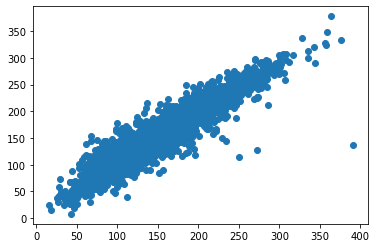

In [5]:
plt.scatter(ppxf_sigma,sigmaStars)
plt.show()

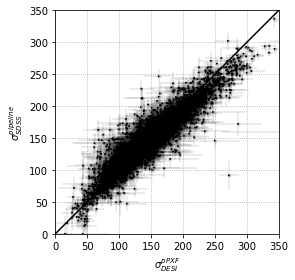

In [6]:
fig, ax = plt.subplots()
ax.set_ylim(0.0,350.0)
ax.set_xlim(0.0,350.0)
xxx=[0,350];yyy=[0,350]
ax.errorbar(ppxf_sigma,veldisp,xerr=ppxf_sigma_error,yerr=veldispErr,fmt=".k",alpha=0.1)
ax.scatter(ppxf_sigma,veldisp,color='black',edgecolor='none',s=3.5)
ax.plot(xxx,yyy,color="black")
ax.set_aspect(1)
ax.set_xlabel(r'$\sigma_{DESI}^{pPXF}$')
ax.set_ylabel(r'$\sigma_{SDSS}^{pipeline}$')
plt.grid(b=True, which='both', color='0.65',linestyle=':')
#plt.legend()#,frameon=False)
plt.tight_layout()
#plt.savefig('sigma_desi_sigmastars.png')
plt.show()

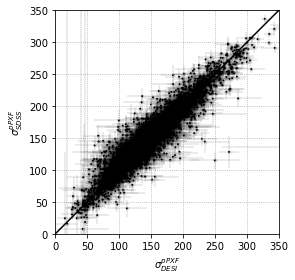

In [7]:
fig, ax = plt.subplots()
ax.set_ylim(0.0,350.0)
ax.set_xlim(0.0,350.0)
xxx=[0,350];yyy=[0,350]
ax.errorbar(ppxf_sigma,sigmaStars,xerr=ppxf_sigma_error,yerr=sigmaStarsErr,fmt=".k",alpha=0.1)
ax.scatter(ppxf_sigma,sigmaStars,color='black',edgecolor='none',s=3.5)
ax.plot(xxx,yyy,color="black")
ax.set_aspect(1)
ax.set_xlabel(r'$\sigma_{DESI}^{pPXF}$')
ax.set_ylabel(r'$\sigma_{SDSS}^{pPXF}$')
plt.grid(b=True, which='both', color='0.65',linestyle=':')
#plt.legend()#,frameon=False)
plt.tight_layout()
#plt.savefig('sigma_desi_sigmastars.png')
plt.show()

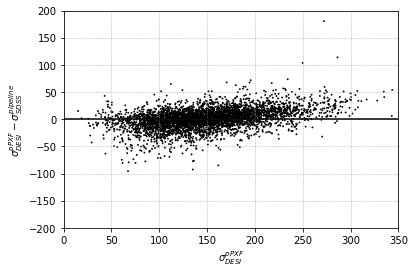

In [8]:
plt.ylim(-200,200)
plt.xlim(0.0,350.0)
plt.scatter(ppxf_sigma,ppxf_sigma-veldisp,color='black',edgecolor='none',s=3.5)
plt.axhline(y=0.0,color="black")
plt.grid(b=True, which='both', color='0.65',linestyle=':')
plt.xlabel(r'$\sigma_{DESI}^{pPXF}$')
plt.ylabel(r'$\sigma_{DESI}^{pPXF} - \sigma_{SDSS}^{pipeline}$')
#plt.savefig('sigma_P_minus_S.png')
plt.show()

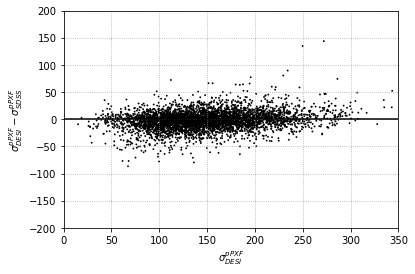

In [9]:
plt.ylim(-200,200)
plt.xlim(0.0,350.0)
plt.scatter(ppxf_sigma,ppxf_sigma-sigmaStars,color='black',edgecolor='none',s=3.5)
plt.axhline(y=0.0,color="black")
plt.grid(b=True, which='both', color='0.65',linestyle=':')
plt.xlabel(r'$\sigma_{DESI}^{pPXF}$')
plt.ylabel(r'$\sigma_{DESI}^{pPXF} - \sigma_{SDSS}^{pPXF}$')
#plt.savefig('sigma_P_minus_S.png')
plt.show()

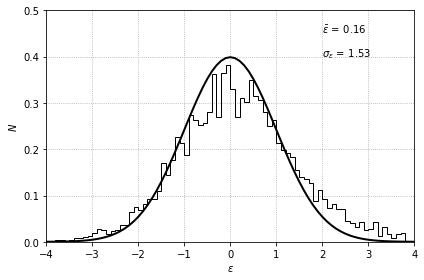

In [10]:
plt.ylim(0.0,0.5)
plt.xlim(-4.0,4.0)
events_prop, edges_prop, patches_prop = plt.hist(pull_pipe_1,bins=np.arange(-5.0,5.0,0.1),density=1,histtype='step',color='black',label='sigmastar_lamost vs. veldisp_sdss')#,label='Normalized uncorrected $P(r)$')#
y = norm.pdf(edges_prop, 0.0, 1.0)
l = plt.plot(edges_prop, y, 'k', linewidth=2,label='Gaussian with mean 0 and $\sigma$ 1')#,label='Gaussian fit to the uncorrected $P(r)$')
#plt.hist(pull_pipe,bins=arange(-5.0,5.0,0.1),color='black')
plt.grid(b=True, which='both', color='0.65',linestyle=':')
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$N$')
plt.text(2.0,0.45,r'$\bar{\epsilon}\/=\/'+'{0:.2f}'.format(np.mean(pull_pipe_1))+'$')#, fontname = 'Times New Roman',size=20)
plt.text(2.0,0.4,r'$\sigma_{\epsilon}\/=\/'+'{0:.2f}'.format(np.std(pull_pipe_1))+'$')#, fontname = 'Times New Roman',size=20)
#plt.legend(fontsize=16)
plt.tight_layout()
#plt.savefig('pull-distribution_internal.pdf')
#plt.savefig('pull-distribution_internal.png')
plt.show()

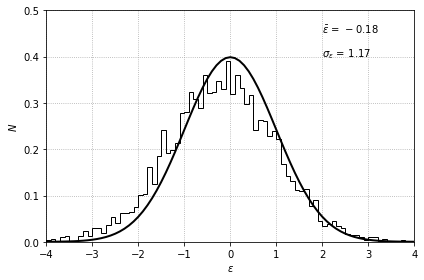

In [11]:
plt.ylim(0.0,0.5)
plt.xlim(-4.0,4.0)
events_prop, edges_prop, patches_prop = plt.hist(pull_pipe_2,bins=np.arange(-5.0,5.0,0.1),density=1,histtype='step',color='black',label='sigmastar_lamost vs. veldisp_sdss')#,label='Normalized uncorrected $P(r)$')#
y = norm.pdf(edges_prop, 0.0, 1.0)
l = plt.plot(edges_prop, y, 'k', linewidth=2,label='Gaussian with mean 0 and $\sigma$ 1')#,label='Gaussian fit to the uncorrected $P(r)$')
#plt.hist(pull_pipe,bins=arange(-5.0,5.0,0.1),color='black')
plt.grid(b=True, which='both', color='0.65',linestyle=':')
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$N$')
plt.text(2.0,0.45,r'$\bar{\epsilon}\/=\/'+'{0:.2f}'.format(np.mean(pull_pipe_2))+'$')#, fontname = 'Times New Roman',size=20)
plt.text(2.0,0.4,r'$\sigma_{\epsilon}\/=\/'+'{0:.2f}'.format(np.std(pull_pipe_2))+'$')#, fontname = 'Times New Roman',size=20)
#plt.legend(fontsize=16)
plt.tight_layout()
#plt.savefig('pull-distribution_internal.pdf')
#plt.savefig('pull-distribution_internal.png')
plt.show()

In [12]:
f_l = pd.read_csv("fuji_lamost.csv")
f_l[:10]

,targetid,ra_1,dec_1,ppxf_sigma,ppxf_sigma_error,DER_SNR,snr_ppxf,obsid,ra_2,dec_2,specname,veldisp,veldisp_err,snrg,snrr,snri
0,39628438608283113,194.221420,27.929491,201.428815,1.704093,59.108758,30.380667,301804166,194.221450,27.929517,spec-57044-HD125932N280356B01_sp04-166.fits,204.0,3.0,57.68,98.14,126.71
1,39628443939243735,193.999798,28.186935,150.801531,1.962831,45.228387,28.515099,301803169,194.000023,28.186870,spec-57044-HD125932N280356B01_sp03-169.fits,153.0,3.0,33.84,50.14,83.52
2,39628422497963985,192.286821,27.368747,169.286710,1.931925,43.583631,28.185122,144510096,192.286830,27.368743,spec-56396-HD125932N280356F01_sp10-096.fits,165.0,3.0,30.29,34.20,56.21
3,39627769679713314,183.210951,-0.836999,96.388279,1.493434,36.287797,27.371505,199807060,183.210980,-0.836977,spec-56654-HD120800N003716B01_sp07-060.fits,88.0,3.0,15.49,30.52,35.38
4,39628443956022818,195.217035,28.366121,182.042481,1.913866,40.114182,27.370550,235904051,195.217020,28.366120,spec-56769-VB194N28V1_sp04-051.fits,166.0,4.0,18.41,35.04,56.04
5,39628411752156938,194.757615,26.815660,230.255531,3.075853,38.141929,26.653628,236005043,194.757530,26.815657,spec-56769-VB194N28V2_sp05-043.fits,224.0,4.0,21.39,52.63,73.96
6,39628427900225097,194.142478,27.538965,164.784607,2.067014,39.001525,26.155518,236003010,194.142430,27.538961,spec-56769-VB194N28V2_sp03-010.fits,161.0,3.0,24.91,39.19,63.72
7,39628433277322723,195.323331,27.809090,203.226170,2.786018,38.411174,25.703834,235904117,195.323330,27.809006,spec-56769-VB194N28V1_sp04-117.fits,195.0,3.0,33.23,60.92,94.28
8,39628459881793324,194.915779,28.926566,165.846742,2.838370,35.623140,25.537105,236015111,194.915740,28.926571,spec-56769-VB194N28V2_sp15-111.fits,164.0,5.0,19.39,34.29,53.00
9,39628438633449214,195.937269,28.084211,168.177420,2.594123,40.520447,25.239801,235908035,195.937280,28.084185,spec-56769-VB194N28V1_sp08-035.fits,151.0,5.0,16.78,41.60,59.31


In [13]:
f_g = pd.read_csv("fuji_gama.csv")
f_g[:3]

,targetid,ra_1,dec_1,ppxf_sigma,ppxf_sigma_error,DER_SNR,snr_ppxf,CATAID_1,SPECID_1,SURVEY_1,SIGSTARCORR,SIGERRSTARCORR
0,39627787807490423,183.516522,-0.069647,92.801843,2.048008,28.323281,21.220779,585584,G12_Y1_FT_003,GAMA,63.117904,9.158942
1,39627745407271782,176.286414,-1.803845,88.612741,2.410858,22.712142,18.478639,136871,G12_Y6_073_144,GAMA,57.927636,13.230152
2,39627794413523072,217.438248,0.253038,189.258549,3.267075,27.356583,8.495166,618938,G15_Y6_089_296,GAMA,166.326129,11.647365


In [14]:
pull_pipe_3 = (f_l.ppxf_sigma - f_l.veldisp)/(np.sqrt((f_l.ppxf_sigma_error*f_l.ppxf_sigma_error)+(f_l.veldisp_err*f_l.veldisp_err)))
pull_pipe_4 = (f_g.ppxf_sigma - f_g.SIGSTARCORR)/(np.sqrt((f_g.ppxf_sigma_error*f_g.ppxf_sigma_error)+(f_g.SIGERRSTARCORR*f_g.SIGERRSTARCORR)))

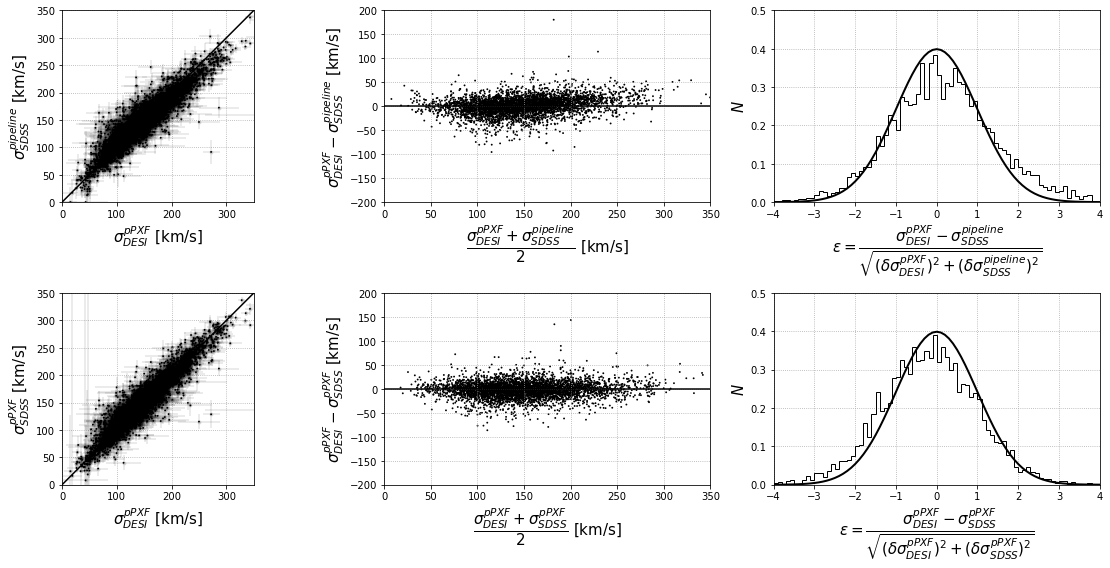

In [15]:
f_1, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(nrows=2,ncols=3, figsize=(16, 8),sharex=False, sharey=False)
ax1.set_ylim(0.0,350.0)
ax1.set_xlim(0.0,350.0)
xxx=[0,350];yyy=[0,350]
ax1.errorbar(ppxf_sigma,veldisp,xerr=ppxf_sigma_error,yerr=veldispErr,fmt=".k",alpha=0.1)
ax1.scatter(ppxf_sigma,veldisp,color='black',edgecolor='none',s=3.5)
ax1.plot(xxx,yyy,color="black")
ax1.set_aspect(1)
ax1.set_xlabel(r'$\sigma_{DESI}^{pPXF}$ [km/s]',size=15)
ax1.set_ylabel(r'$\sigma_{SDSS}^{pipeline}$ [km/s]',size=15)
ax1.grid(b=True, which='both', color='0.65',linestyle=':')

ax4.set_ylim(0.0,350.0)
ax4.set_xlim(0.0,350.0)
xxx=[0,350];yyy=[0,350]
ax4.errorbar(ppxf_sigma,sigmaStars,xerr=ppxf_sigma_error,yerr=sigmaStarsErr,fmt=".k",alpha=0.1)
ax4.scatter(ppxf_sigma,sigmaStars,color='black',edgecolor='none',s=3.5)
ax4.plot(xxx,yyy,color="black")
ax4.set_aspect(1)
ax4.set_xlabel(r'$\sigma_{DESI}^{pPXF}$ [km/s]',size=15)
ax4.set_ylabel(r'$\sigma_{SDSS}^{pPXF}$ [km/s]',size=15)
ax4.grid(b=True, which='both', color='0.65',linestyle=':')

ax2.set_ylim(-200,200)
ax2.set_xlim(0.0,350.0)
ax2.scatter(((ppxf_sigma+veldisp)/2.),ppxf_sigma-veldisp,color='black',edgecolor='none',s=3.5)
ax2.axhline(y=0.0,color="black")
ax2.grid(b=True, which='both', color='0.65',linestyle=':')
ax2.set_xlabel(r'$\dfrac{\sigma_{DESI}^{pPXF} + \sigma_{SDSS}^{pipeline}}{2}$ [km/s]',size=15)
ax2.set_ylabel(r'$\sigma_{DESI}^{pPXF} - \sigma_{SDSS}^{pipeline}$ [km/s]',size=15)

ax5.set_ylim(-200,200)
ax5.set_xlim(0.0,350.0)
ax5.scatter(((ppxf_sigma+sigmaStars)/2.),ppxf_sigma-sigmaStars,color='black',edgecolor='none',s=3.5)
ax5.axhline(y=0.0,color="black")
ax5.grid(b=True, which='both', color='0.65',linestyle=':')
ax5.set_xlabel(r'$\dfrac{\sigma_{DESI}^{pPXF} + \sigma_{SDSS}^{pPXF}}{2}$ [km/s]',size=15)
ax5.set_ylabel(r'$\sigma_{DESI}^{pPXF} - \sigma_{SDSS}^{pPXF}$ [km/s]',size=15)

ax3.set_ylim(0.0,0.5)
ax3.set_xlim(-4.0,4.0)
events_prop, edges_prop, patches_prop = ax3.hist(pull_pipe_1,bins=np.arange(-5.0,5.0,0.1),density=1,histtype='step',color='black',label='sigmastar_lamost vs. veldisp_sdss')#,label='Normalized uncorrected $P(r)$')#
y = norm.pdf(edges_prop, 0.0, 1.0)
l = ax3.plot(edges_prop, y, 'k', linewidth=2,label='Gaussian with mean 0 and $\sigma$ 1')#,label='Gaussian fit to the uncorrected $P(r)$')
#plt.hist(pull_pipe,bins=arange(-5.0,5.0,0.1),color='black')
ax3.grid(b=True, which='both', color='0.65',linestyle=':')
ax3.set_xlabel(r'$\epsilon = \dfrac{\sigma_{DESI}^{pPXF} - \sigma_{SDSS}^{pipeline}}{\sqrt{(\delta \sigma_{DESI}^{pPXF})^2 + (\delta \sigma_{SDSS}^{pipeline})^2}}$',size=15)
ax3.set_ylabel(r'$N$',size=15)
# ax3.text(2.0,0.45,r'$N\/=\/'+'{0:.0f}'.format(len(pull_pipe_1))+'$',size=15)
# ax3.text(2.0,0.4,r'$\bar{\epsilon}\/=\/'+'{0:.2f}'.format(np.mean(pull_pipe_1))+'$',size=15)#, fontname = 'Times New Roman',size=20)
# ax3.text(2.0,0.35,r'$\sigma_{\epsilon}\/=\/'+'{0:.2f}'.format(np.std(pull_pipe_1))+'$',size=15)#, fontname = 'Times New Roman',size=20)

ax6.set_ylim(0.0,0.5)
ax6.set_xlim(-4.0,4.0)
events_prop, edges_prop, patches_prop = ax6.hist(pull_pipe_2,bins=np.arange(-5.0,5.0,0.1),density=1,histtype='step',color='black',label='sigmastar_lamost vs. veldisp_sdss')#,label='Normalized uncorrected $P(r)$')#
y = norm.pdf(edges_prop, 0.0, 1.0)
l = ax6.plot(edges_prop, y, 'k', linewidth=2,label='Gaussian with mean 0 and $\sigma$ 1')#,label='Gaussian fit to the uncorrected $P(r)$')
#plt.hist(pull_pipe,bins=arange(-5.0,5.0,0.1),color='black')
ax6.grid(b=True, which='both', color='0.65',linestyle=':')
ax6.set_xlabel(r'$\epsilon = \dfrac{\sigma_{DESI}^{pPXF} - \sigma_{SDSS}^{pPXF}}{\sqrt{(\delta \sigma_{DESI}^{pPXF})^2 + (\delta \sigma_{SDSS}^{pPXF})^2}}$',size=15)
ax6.set_ylabel(r'$N$',size=15)
# ax6.text(2.0,0.45,r'$N\/=\/'+'{0:.0f}'.format(len(pull_pipe_2))+'$',size=15)
# ax6.text(2.0,0.4,r'$\bar{\epsilon}\/=\/'+'{0:.2f}'.format(np.mean(pull_pipe_2))+'$',size=15)#, fontname = 'Times New Roman',size=20)
# ax6.text(2.0,0.35,r'$\sigma_{\epsilon}\/=\/'+'{0:.2f}'.format(np.std(pull_pipe_2))+'$',size=15)#, fontname = 'Times New Roman',size=20)

plt.tight_layout()
plt.savefig('external_consistency_v2.png')
plt.savefig('external_consistency_v2.pdf')
plt.show()

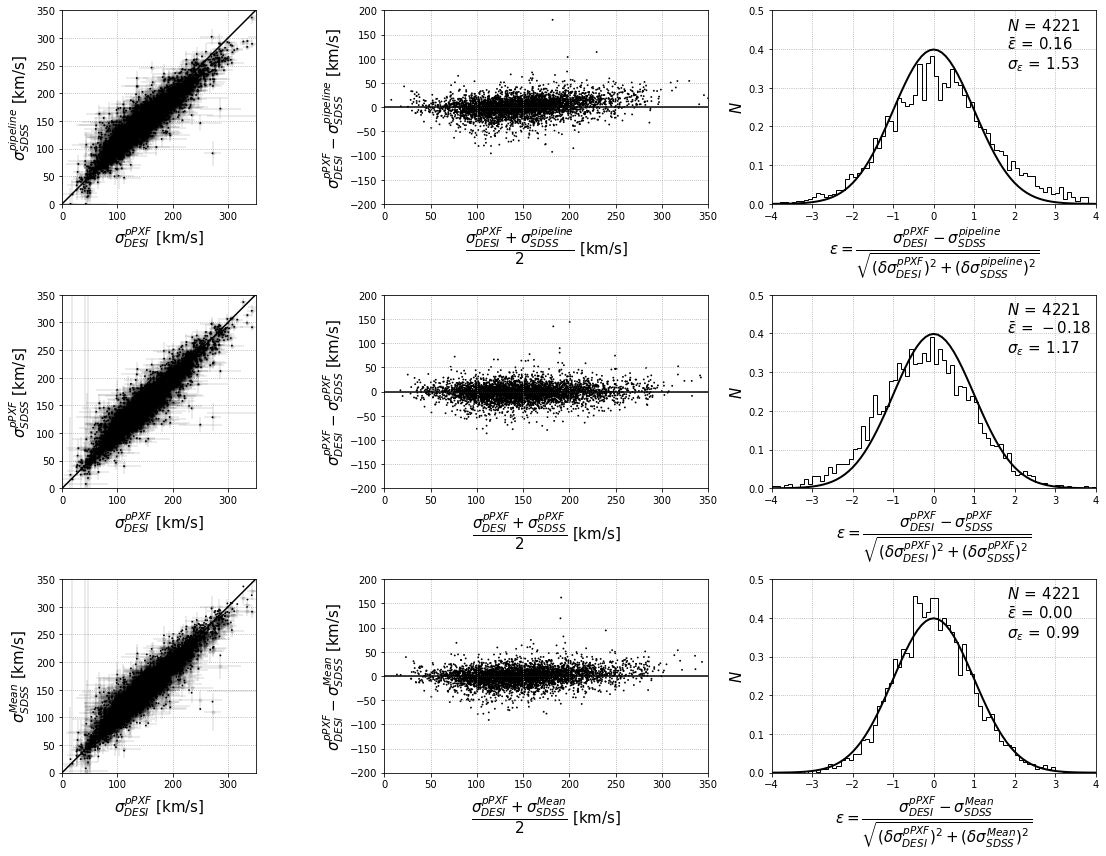

In [16]:
f_1, ((ax1, ax2, ax3),(ax4, ax5, ax6),(ax7,ax8,ax9)) = plt.subplots(nrows=3,ncols=3, figsize=(16, 12),sharex=False, sharey=False)
ax1.set_ylim(0.0,350.0)
ax1.set_xlim(0.0,350.0)
xxx=[0,350];yyy=[0,350]
ax1.errorbar(ppxf_sigma,veldisp,xerr=ppxf_sigma_error,yerr=veldispErr,fmt=".k",alpha=0.1)
ax1.scatter(ppxf_sigma,veldisp,color='black',edgecolor='none',s=3.5)
ax1.plot(xxx,yyy,color="black")
ax1.set_aspect(1)
ax1.set_xlabel(r'$\sigma_{DESI}^{pPXF}$ [km/s]',size=15)
ax1.set_ylabel(r'$\sigma_{SDSS}^{pipeline}$ [km/s]',size=15)
ax1.grid(b=True, which='both', color='0.65',linestyle=':')

ax4.set_ylim(0.0,350.0)
ax4.set_xlim(0.0,350.0)
xxx=[0,350];yyy=[0,350]
ax4.errorbar(ppxf_sigma,sigmaStars,xerr=ppxf_sigma_error,yerr=sigmaStarsErr,fmt=".k",alpha=0.1)
ax4.scatter(ppxf_sigma,sigmaStars,color='black',edgecolor='none',s=3.5)
ax4.plot(xxx,yyy,color="black")
ax4.set_aspect(1)
ax4.set_xlabel(r'$\sigma_{DESI}^{pPXF}$ [km/s]',size=15)
ax4.set_ylabel(r'$\sigma_{SDSS}^{pPXF}$ [km/s]',size=15)
ax4.grid(b=True, which='both', color='0.65',linestyle=':')

ax7.set_ylim(0.0,350.0)
ax7.set_xlim(0.0,350.0)
xxx=[0,350];yyy=[0,350]
ax7.errorbar(ppxf_sigma,sigma_sdss_m,xerr=ppxf_sigma_error,yerr=sigma_sdss_e_m,fmt=".k",alpha=0.1)
ax7.scatter(ppxf_sigma,sigmaStars,color='black',edgecolor='none',s=3.5)
ax7.plot(xxx,yyy,color="black")
ax7.set_aspect(1)
ax7.set_xlabel(r'$\sigma_{DESI}^{pPXF}$ [km/s]',size=15)
ax7.set_ylabel(r'$\sigma_{SDSS}^{Mean}$ [km/s]',size=15)
ax7.grid(b=True, which='both', color='0.65',linestyle=':')

ax2.set_ylim(-200,200)
ax2.set_xlim(0.0,350.0)
ax2.scatter(((ppxf_sigma+veldisp)/2.),ppxf_sigma-veldisp,color='black',edgecolor='none',s=3.5)
ax2.axhline(y=0.0,color="black")
ax2.grid(b=True, which='both', color='0.65',linestyle=':')
ax2.set_xlabel(r'$\dfrac{\sigma_{DESI}^{pPXF} + \sigma_{SDSS}^{pipeline}}{2}$ [km/s]',size=15)
ax2.set_ylabel(r'$\sigma_{DESI}^{pPXF} - \sigma_{SDSS}^{pipeline}$ [km/s]',size=15)

ax5.set_ylim(-200,200)
ax5.set_xlim(0.0,350.0)
ax5.scatter(((ppxf_sigma+sigmaStars)/2.),ppxf_sigma-sigmaStars,color='black',edgecolor='none',s=3.5)
ax5.axhline(y=0.0,color="black")
ax5.grid(b=True, which='both', color='0.65',linestyle=':')
ax5.set_xlabel(r'$\dfrac{\sigma_{DESI}^{pPXF} + \sigma_{SDSS}^{pPXF}}{2}$ [km/s]',size=15)
ax5.set_ylabel(r'$\sigma_{DESI}^{pPXF} - \sigma_{SDSS}^{pPXF}$ [km/s]',size=15)

ax8.set_ylim(-200,200)
ax8.set_xlim(0.0,350.0)
ax8.scatter(((ppxf_sigma+sigma_sdss_m)/2.),ppxf_sigma-sigma_sdss_m,color='black',edgecolor='none',s=3.5)
ax8.axhline(y=0.0,color="black")
ax8.grid(b=True, which='both', color='0.65',linestyle=':')
ax8.set_xlabel(r'$\dfrac{\sigma_{DESI}^{pPXF} + \sigma_{SDSS}^{Mean}}{2}$ [km/s]',size=15)
ax8.set_ylabel(r'$\sigma_{DESI}^{pPXF} - \sigma_{SDSS}^{Mean}$ [km/s]',size=15)

ax3.set_ylim(0.0,0.5)
ax3.set_xlim(-4.0,4.0)
events_prop, edges_prop, patches_prop = ax3.hist(pull_pipe_1,bins=np.arange(-5.0,5.0,0.1),density=1,histtype='step',color='black',label='sigmastar_lamost vs. veldisp_sdss')#,label='Normalized uncorrected $P(r)$')#
y = norm.pdf(edges_prop, 0.0, 1.0)
l = ax3.plot(edges_prop, y, 'k', linewidth=2,label='Gaussian with mean 0 and $\sigma$ 1')#,label='Gaussian fit to the uncorrected $P(r)$')
#plt.hist(pull_pipe,bins=arange(-5.0,5.0,0.1),color='black')
ax3.grid(b=True, which='both', color='0.65',linestyle=':')
ax3.set_xlabel(r'$\epsilon = \dfrac{\sigma_{DESI}^{pPXF} - \sigma_{SDSS}^{pipeline}}{\sqrt{(\delta \sigma_{DESI}^{pPXF})^2 + (\delta \sigma_{SDSS}^{pipeline})^2}}$',size=15)
ax3.set_ylabel(r'$N$',size=15)
ax3.text(2.0-0.2,0.45,r'$N\/=\/'+'{0:.0f}'.format(len(pull_pipe_1))+'$',size=15)
ax3.text(2.0-0.2,0.4,r'$\bar{\epsilon}\/=\/'+'{0:.2f}'.format(np.mean(pull_pipe_1))+'$',size=15)#, fontname = 'Times New Roman',size=20)
ax3.text(2.0-0.2,0.35,r'$\sigma_{\epsilon}\/=\/'+'{0:.2f}'.format(np.std(pull_pipe_1))+'$',size=15)#, fontname = 'Times New Roman',size=20)

ax6.set_ylim(0.0,0.5)
ax6.set_xlim(-4.0,4.0)
events_prop, edges_prop, patches_prop = ax6.hist(pull_pipe_2,bins=np.arange(-5.0,5.0,0.1),density=1,histtype='step',color='black',label='sigmastar_lamost vs. veldisp_sdss')#,label='Normalized uncorrected $P(r)$')#
y = norm.pdf(edges_prop, 0.0, 1.0)
l = ax6.plot(edges_prop, y, 'k', linewidth=2,label='Gaussian with mean 0 and $\sigma$ 1')#,label='Gaussian fit to the uncorrected $P(r)$')
#plt.hist(pull_pipe,bins=arange(-5.0,5.0,0.1),color='black')
ax6.grid(b=True, which='both', color='0.65',linestyle=':')
ax6.set_xlabel(r'$\epsilon = \dfrac{\sigma_{DESI}^{pPXF} - \sigma_{SDSS}^{pPXF}}{\sqrt{(\delta \sigma_{DESI}^{pPXF})^2 + (\delta \sigma_{SDSS}^{pPXF})^2}}$',size=15)
ax6.set_ylabel(r'$N$',size=15)
ax6.text(2.0-0.2,0.45,r'$N\/=\/'+'{0:.0f}'.format(len(pull_pipe_2))+'$',size=15)
ax6.text(2.0-0.2,0.4,r'$\bar{\epsilon}\/=\/'+'{0:.2f}'.format(np.mean(pull_pipe_2))+'$',size=15)#, fontname = 'Times New Roman',size=20)
ax6.text(2.0-0.2,0.35,r'$\sigma_{\epsilon}\/=\/'+'{0:.2f}'.format(np.std(pull_pipe_2))+'$',size=15)#, fontname = 'Times New Roman',size=20)

ax9.set_ylim(0.0,0.5)
ax9.set_xlim(-4.0,4.0)
events_prop, edges_prop, patches_prop = ax9.hist(pull_pipe_m,bins=np.arange(-5.0,5.0,0.1),density=1,histtype='step',color='black',label='sigmastar_lamost vs. veldisp_sdss')#,label='Normalized uncorrected $P(r)$')#
y = norm.pdf(edges_prop, 0.0, 1.0)
l = ax9.plot(edges_prop, y, 'k', linewidth=2,label='Gaussian with mean 0 and $\sigma$ 1')#,label='Gaussian fit to the uncorrected $P(r)$')
#plt.hist(pull_pipe,bins=arange(-5.0,5.0,0.1),color='black')
ax9.grid(b=True, which='both', color='0.65',linestyle=':')
ax9.set_xlabel(r'$\epsilon = \dfrac{\sigma_{DESI}^{pPXF} - \sigma_{SDSS}^{Mean}}{\sqrt{(\delta \sigma_{DESI}^{pPXF})^2 + (\delta \sigma_{SDSS}^{Mean})^2}}$',size=15)
ax9.set_ylabel(r'$N$',size=15)
ax9.text(2.0-0.2,0.45,r'$N\/=\/'+'{0:.0f}'.format(len(pull_pipe_m))+'$',size=15)
ax9.text(2.0-0.2,0.4,r'$\bar{\epsilon}\/=\/'+'{0:.2f}'.format(np.mean(pull_pipe_m))+'$',size=15)#, fontname = 'Times New Roman',size=20)
ax9.text(2.0-0.2,0.35,r'$\sigma_{\epsilon}\/=\/'+'{0:.2f}'.format(np.std(pull_pipe_m))+'$',size=15)#, fontname = 'Times New Roman',size=20)



plt.tight_layout()
plt.savefig('external_consistency_v3.png')
plt.savefig('external_consistency_v3.pdf')
plt.show()

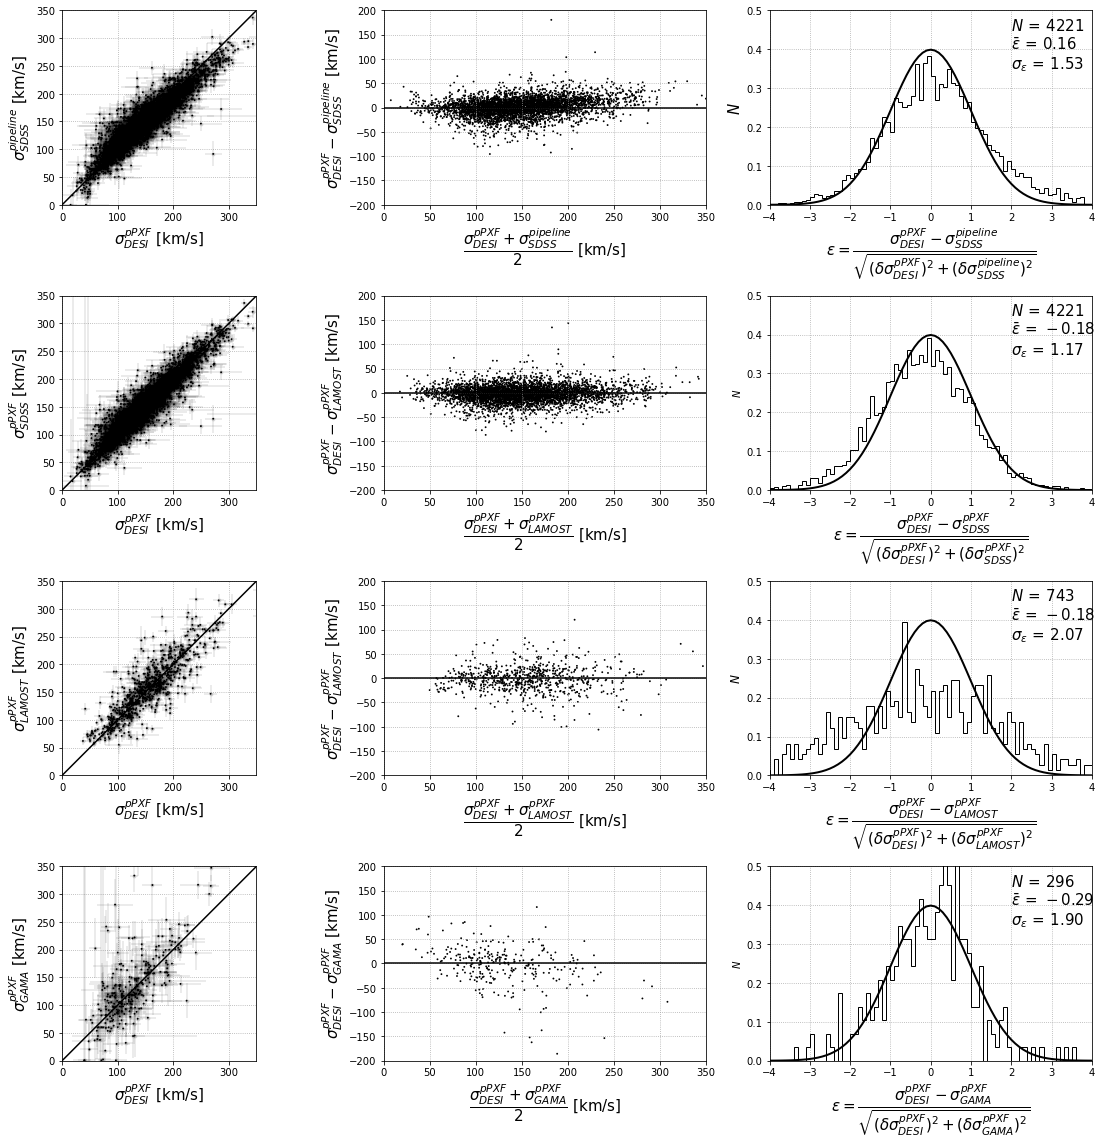

In [17]:
f_1, ((ax1, ax2, ax3),(ax4, ax5, ax6),(ax7, ax8, ax9),(ax10, ax11, ax12)) = plt.subplots(nrows=4,ncols=3, figsize=(16, 16),sharex=False, sharey=False)
ax1.set_ylim(0.0,350.0)
ax1.set_xlim(0.0,350.0)
xxx=[0,350];yyy=[0,350]
ax1.errorbar(ppxf_sigma,veldisp,xerr=ppxf_sigma_error,yerr=veldispErr,fmt=".k",alpha=0.1)
ax1.scatter(ppxf_sigma,veldisp,color='black',edgecolor='none',s=3.5)
ax1.plot(xxx,yyy,color="black")
ax1.set_aspect(1)
ax1.set_xlabel(r'$\sigma_{DESI}^{pPXF}$ [km/s]',size=15)
ax1.set_ylabel(r'$\sigma_{SDSS}^{pipeline}$ [km/s]',size=15)
ax1.grid(b=True, which='both', color='0.65',linestyle=':')

ax4.set_ylim(0.0,350.0)
ax4.set_xlim(0.0,350.0)
xxx=[0,350];yyy=[0,350]
ax4.errorbar(ppxf_sigma,sigmaStars,xerr=ppxf_sigma_error,yerr=sigmaStarsErr,fmt=".k",alpha=0.1)
ax4.scatter(ppxf_sigma,sigmaStars,color='black',edgecolor='none',s=3.5)
ax4.plot(xxx,yyy,color="black")
ax4.set_aspect(1)
ax4.set_xlabel(r'$\sigma_{DESI}^{pPXF}$ [km/s]',size=15)
ax4.set_ylabel(r'$\sigma_{SDSS}^{pPXF}$ [km/s]',size=15)
ax4.grid(b=True, which='both', color='0.65',linestyle=':')

ax7.set_ylim(0.0,350.0)
ax7.set_xlim(0.0,350.0)
xxx=[0,350];yyy=[0,350]
ax7.errorbar(f_l.ppxf_sigma,f_l.veldisp,xerr=f_l.ppxf_sigma_error,yerr=f_l.veldisp_err,fmt=".k",alpha=0.1)
ax7.scatter(f_l.ppxf_sigma,f_l.veldisp,color='black',edgecolor='none',s=3.5)
ax7.plot(xxx,yyy,color="black")
ax7.set_aspect(1)
ax7.set_xlabel(r'$\sigma_{DESI}^{pPXF}$ [km/s]',size=15)
ax7.set_ylabel(r'$\sigma_{LAMOST}^{pPXF}$ [km/s]',size=15)
ax7.grid(b=True, which='both', color='0.65',linestyle=':')

ax10.set_ylim(0.0,350.0)
ax10.set_xlim(0.0,350.0)
xxx=[0,350];yyy=[0,350]
ax10.errorbar(f_g.ppxf_sigma,f_g.SIGSTARCORR,xerr=f_g.ppxf_sigma_error,yerr=f_g.SIGERRSTARCORR,fmt=".k",alpha=0.1)
ax10.scatter(f_g.ppxf_sigma,f_g.SIGSTARCORR,color='black',edgecolor='none',s=3.5)
ax10.plot(xxx,yyy,color="black")
ax10.set_aspect(1)
ax10.set_xlabel(r'$\sigma_{DESI}^{pPXF}$ [km/s]',size=15)
ax10.set_ylabel(r'$\sigma_{GAMA}^{pPXF}$ [km/s]',size=15)
ax10.grid(b=True, which='both', color='0.65',linestyle=':')

ax2.set_ylim(-200,200)
ax2.set_xlim(0.0,350.0)
ax2.scatter(((ppxf_sigma+veldisp)/2.),ppxf_sigma-veldisp,color='black',edgecolor='none',s=3.5)
ax2.axhline(y=0.0,color="black")
ax2.grid(b=True, which='both', color='0.65',linestyle=':')
ax2.set_xlabel(r'$\dfrac{\sigma_{DESI}^{pPXF} + \sigma_{SDSS}^{pipeline}}{2}$ [km/s]',size=15)
ax2.set_ylabel(r'$\sigma_{DESI}^{pPXF} - \sigma_{SDSS}^{pipeline}$ [km/s]',size=15)

ax5.set_ylim(-200,200)
ax5.set_xlim(0.0,350.0)
ax5.scatter(((ppxf_sigma+sigmaStars)/2.),ppxf_sigma-sigmaStars,color='black',edgecolor='none',s=3.5)
ax5.axhline(y=0.0,color="black")
ax5.grid(b=True, which='both', color='0.65',linestyle=':')
ax5.set_xlabel(r'$\dfrac{\sigma_{DESI}^{pPXF} + \sigma_{LAMOST}^{pPXF}}{2}$ [km/s]',size=15)
ax5.set_ylabel(r'$\sigma_{DESI}^{pPXF} - \sigma_{LAMOST}^{pPXF}$ [km/s]',size=15)

ax8.set_ylim(-200,200)
ax8.set_xlim(0.0,350.0)
ax8.scatter(((f_l.ppxf_sigma+f_l.veldisp)/2.),f_l.ppxf_sigma-f_l.veldisp,color='black',edgecolor='none',s=3.5)
ax8.axhline(y=0.0,color="black")
ax8.grid(b=True, which='both', color='0.65',linestyle=':')
ax8.set_xlabel(r'$\dfrac{\sigma_{DESI}^{pPXF} + \sigma_{LAMOST}^{pPXF}}{2}$ [km/s]',size=15)
ax8.set_ylabel(r'$\sigma_{DESI}^{pPXF} - \sigma_{LAMOST}^{pPXF}$ [km/s]',size=15)

ax11.set_ylim(-200,200)
ax11.set_xlim(0.0,350.0)
ax11.scatter(((f_g.ppxf_sigma+f_g.SIGSTARCORR)/2.),f_g.ppxf_sigma-f_g.SIGSTARCORR,color='black',edgecolor='none',s=3.5)
ax11.axhline(y=0.0,color="black")
ax11.grid(b=True, which='both', color='0.65',linestyle=':')
ax11.set_xlabel(r'$\dfrac{\sigma_{DESI}^{pPXF} + \sigma_{GAMA}^{pPXF}}{2}$ [km/s]',size=15)
ax11.set_ylabel(r'$\sigma_{DESI}^{pPXF} - \sigma_{GAMA}^{pPXF}$ [km/s]',size=15)

ax3.set_ylim(0.0,0.5)
ax3.set_xlim(-4.0,4.0)
events_prop, edges_prop, patches_prop = ax3.hist(pull_pipe_1,bins=np.arange(-5.0,5.0,0.1),density=1,histtype='step',color='black',label='sigmastar_lamost vs. veldisp_sdss')#,label='Normalized uncorrected $P(r)$')#
y = norm.pdf(edges_prop, 0.0, 1.0)
l = ax3.plot(edges_prop, y, 'k', linewidth=2,label='Gaussian with mean 0 and $\sigma$ 1')#,label='Gaussian fit to the uncorrected $P(r)$')
#plt.hist(pull_pipe,bins=arange(-5.0,5.0,0.1),color='black')
ax3.grid(b=True, which='both', color='0.65',linestyle=':')
ax3.set_xlabel(r'$\epsilon = \dfrac{\sigma_{DESI}^{pPXF} - \sigma_{SDSS}^{pipeline}}{\sqrt{(\delta \sigma_{DESI}^{pPXF})^2 + (\delta \sigma_{SDSS}^{pipeline})^2}}$',size=15)
ax3.set_ylabel(r'$N$',size=15)
ax3.text(2.0,0.45,r'$N\/=\/'+'{0:.0f}'.format(len(pull_pipe_1))+'$',size=15)
ax3.text(2.0,0.4,r'$\bar{\epsilon}\/=\/'+'{0:.2f}'.format(np.mean(pull_pipe_1))+'$',size=15)#, fontname = 'Times New Roman',size=20)
ax3.text(2.0,0.35,r'$\sigma_{\epsilon}\/=\/'+'{0:.2f}'.format(np.std(pull_pipe_1))+'$',size=15)#, fontname = 'Times New Roman',size=20)

ax6.set_ylim(0.0,0.5)
ax6.set_xlim(-4.0,4.0)
events_prop, edges_prop, patches_prop = ax6.hist(pull_pipe_2,bins=np.arange(-5.0,5.0,0.1),density=1,histtype='step',color='black',label='sigmastar_lamost vs. veldisp_sdss')#,label='Normalized uncorrected $P(r)$')#
y = norm.pdf(edges_prop, 0.0, 1.0)
l = ax6.plot(edges_prop, y, 'k', linewidth=2,label='Gaussian with mean 0 and $\sigma$ 1')#,label='Gaussian fit to the uncorrected $P(r)$')
#plt.hist(pull_pipe,bins=arange(-5.0,5.0,0.1),color='black')
ax6.grid(b=True, which='both', color='0.65',linestyle=':')
ax6.set_xlabel(r'$\epsilon = \dfrac{\sigma_{DESI}^{pPXF} - \sigma_{SDSS}^{pPXF}}{\sqrt{(\delta \sigma_{DESI}^{pPXF})^2 + (\delta \sigma_{SDSS}^{pPXF})^2}}$',size=15)
ax6.set_ylabel(r'$N$')
ax6.text(2.0,0.45,r'$N\/=\/'+'{0:.0f}'.format(len(pull_pipe_2))+'$',size=15)
ax6.text(2.0,0.4,r'$\bar{\epsilon}\/=\/'+'{0:.2f}'.format(np.mean(pull_pipe_2))+'$',size=15)#, fontname = 'Times New Roman',size=20)
ax6.text(2.0,0.35,r'$\sigma_{\epsilon}\/=\/'+'{0:.2f}'.format(np.std(pull_pipe_2))+'$',size=15)#, fontname = 'Times New Roman',size=20)

ax9.set_ylim(0.0,0.5)
ax9.set_xlim(-4.0,4.0)
events_prop, edges_prop, patches_prop = ax9.hist(pull_pipe_3,bins=np.arange(-5.0,5.0,0.1),density=1,histtype='step',color='black',label='sigmastar_lamost vs. veldisp_sdss')#,label='Normalized uncorrected $P(r)$')#
y = norm.pdf(edges_prop, 0.0, 1.0)
l = ax9.plot(edges_prop, y, 'k', linewidth=2,label='Gaussian with mean 0 and $\sigma$ 1')#,label='Gaussian fit to the uncorrected $P(r)$')
#plt.hist(pull_pipe,bins=arange(-5.0,5.0,0.1),color='black')
ax9.grid(b=True, which='both', color='0.65',linestyle=':')
ax9.set_xlabel(r'$\epsilon = \dfrac{\sigma_{DESI}^{pPXF} - \sigma_{LAMOST}^{pPXF}}{\sqrt{(\delta \sigma_{DESI}^{pPXF})^2 + (\delta \sigma_{LAMOST}^{pPXF})^2}}$',size=15)
ax9.set_ylabel(r'$N$',size=12)
ax9.text(2.0,0.45,r'$N\/=\/'+'{0:.0f}'.format(len(pull_pipe_3))+'$',size=15)
ax9.text(2.0,0.4,r'$\bar{\epsilon}\/=\/'+'{0:.2f}'.format(np.mean(pull_pipe_3))+'$',size=15)#, fontname = 'Times New Roman',size=20)
ax9.text(2.0,0.35,r'$\sigma_{\epsilon}\/=\/'+'{0:.2f}'.format(np.std(pull_pipe_3))+'$',size=15)#, fontname = 'Times New Roman',size=20)

ax12.set_ylim(0.0,0.5)
ax12.set_xlim(-4.0,4.0)
events_prop, edges_prop, patches_prop = ax12.hist(pull_pipe_4,bins=np.arange(-5.0,5.0,0.1),density=1,histtype='step',color='black',label='sigmastar_lamost vs. veldisp_sdss')#,label='Normalized uncorrected $P(r)$')#
y = norm.pdf(edges_prop, 0.0, 1.0)
l = ax12.plot(edges_prop, y, 'k', linewidth=2,label='Gaussian with mean 0 and $\sigma$ 1')#,label='Gaussian fit to the uncorrected $P(r)$')
#plt.hist(pull_pipe,bins=arange(-5.0,5.0,0.1),color='black')
ax12.grid(b=True, which='both', color='0.65',linestyle=':')
ax12.set_xlabel(r'$\epsilon = \dfrac{\sigma_{DESI}^{pPXF} - \sigma_{GAMA}^{pPXF}}{\sqrt{(\delta \sigma_{DESI}^{pPXF})^2 + (\delta \sigma_{GAMA}^{pPXF})^2}}$',size=15)
ax12.set_ylabel(r'$N$')
ax12.text(2.0,0.45,r'$N\/=\/'+'{0:.0f}'.format(len(pull_pipe_4))+'$',size=15)
ax12.text(2.0,0.4,r'$\bar{\epsilon}\/=\/'+'{0:.2f}'.format(np.mean(pull_pipe_4))+'$',size=15)#, fontname = 'Times New Roman',size=20)
ax12.text(2.0,0.35,r'$\sigma_{\epsilon}\/=\/'+'{0:.2f}'.format(np.std(pull_pipe_4))+'$',size=15)#, fontname = 'Times New Roman',size=20)

plt.tight_layout()
plt.savefig('external_consistency.png')
plt.savefig('external_consistency.pdf')
plt.show()

In [18]:
fuji_sdss = pd.read_csv('fuji_pv_vs_sdss.csv')
fuji_sdss

,ra_1,dec_1,targetid_1,id,healpix,survey,program,targetid.1,z_1,zerr,...,s_2,es_2,Sn_2,logdist_2,logdist_err_2,logdist_alpha_2,logdist_corr,logdist_corr_err,logdist_corr_alpha,Separation
0,184.913600,-0.750861,39627769709071900,1516,26254,sv1,bright,39627769709071900,0.029896,0.000003,...,2.14374,0.01172,0.35531,-0.022683,0.097502,-0.525756,-0.040860,0.095050,-0.547014,0.113709
1,193.922076,27.250763,39628422523128777,1304,28149,sv1,bright,39628422523128777,0.023694,0.000007,...,2.41535,0.00538,1.00000,-0.001810,0.096055,-0.397190,0.038192,0.092604,-0.463153,0.028332
2,155.787603,32.907518,39632940354767051,764,5322,sv1,bright,39632940354767051,0.037276,0.000005,...,2.31762,0.00928,1.00000,-0.011851,0.097986,-0.566901,-0.017032,0.095540,-0.611431,0.044828
3,163.673104,47.451925,39633207917808010,830,5907,sv1,bright,39633207917808010,0.021767,0.000003,...,2.01695,0.01267,0.18011,0.082435,0.096777,-0.257630,0.096190,0.086367,-0.210012,0.084359
4,121.505853,39.964619,39633076141163860,990,6545,sv1,bright,39633076141163860,0.039935,0.000004,...,2.30854,0.00948,1.00000,0.037129,0.097713,-0.560834,0.028602,0.095281,-0.601838,0.092683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,253.397853,33.051466,39632941730499772,3529,9334,sv3,bright,39632941730499772,0.084868,0.000019,...,2.36517,0.01707,1.00000,-0.096299,0.106399,-0.489771,-0.071176,0.091470,-0.398836,0.058788
892,247.703678,42.392285,39633123280945563,3340,9984,sv3,bright,39633123280945563,0.093304,0.000023,...,2.24241,0.01450,1.00000,0.134279,0.102902,-0.570189,0.121443,0.105674,-0.674806,0.080435
893,252.120915,36.145967,39633006431830890,3351,9431,sv3,bright,39633006431830890,0.071456,0.000023,...,2.19952,0.01453,1.00000,0.048353,0.102407,-0.579409,0.035917,0.101782,-0.686911,0.031965
894,218.374730,3.905292,39627884997904170,3368,25982,sv3,bright,39627884997904170,0.086229,0.000022,...,2.24813,0.01876,0.88026,0.052369,0.105099,-0.555680,0.055738,0.096673,-0.529588,0.039748


In [20]:
fuji_sdss_golds = pd.merge(fuji_sdss,fdata,left_on='targetid_1',right_on='targetid')
fuji_sdss_golds

,ra_1_x,dec_1_x,targetid_1,id,healpix,survey,program,targetid.1,z_1,zerr,...,DER_SNR_y,snr_ppxf_y,objid_2,ra_2,dec_2,h_alpha_eqw,sigmaStars,sigmaStarsErr,veldisp,veldispErr
0,184.913600,-0.750861,39627769709071900,1516,26254,sv1,bright,39627769709071900,0.029896,0.000003,...,55.533676,33.891261,1237654669214023822,184.913612,-0.750832,-0.251797,133.23210,3.595464,129.34720,3.885587
1,193.922076,27.250763,39628422523128777,1304,28149,sv1,bright,39628422523128777,0.023694,0.000007,...,76.538311,31.694018,1237667323260502019,193.922068,27.250765,-0.256416,249.99830,3.095356,251.30850,3.608889
2,155.787603,32.907518,39632940354767051,764,5322,sv1,bright,39632940354767051,0.037276,0.000005,...,39.998815,29.214919,1237664877807730696,155.787606,32.907530,-0.302244,198.60010,4.244899,180.25100,4.895857
3,163.673104,47.451925,39633207917808010,830,5907,sv1,bright,39633207917808010,0.021767,0.000003,...,36.717824,28.963643,1237658203968438295,163.673086,47.451945,-0.156219,98.58618,2.877252,95.16629,3.264127
4,121.505853,39.964619,39633076141163860,990,6545,sv1,bright,39633076141163860,0.039935,0.000004,...,55.415768,28.584398,1237653587407798408,121.505866,39.964643,-0.435603,192.78380,4.209323,178.69100,4.711245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,253.397853,33.051466,39632941730499772,3529,9334,sv3,bright,39632941730499772,0.084868,0.000019,...,8.239797,2.355717,1237659326032969995,253.397872,33.051466,-0.894684,215.67500,8.475019,209.24580,9.078645
856,247.703678,42.392285,39633123280945563,3340,9984,sv3,bright,39633123280945563,0.093304,0.000023,...,6.869419,2.292318,1237655473967399207,247.703679,42.392307,-0.061724,161.28080,5.384924,161.66710,5.812622
857,252.120915,36.145967,39633006431830890,3351,9431,sv3,bright,39633006431830890,0.071456,0.000023,...,6.311163,2.247537,1237655472896737701,252.120907,36.145961,-0.127251,151.38680,5.063280,150.39700,6.128177
858,218.374730,3.905292,39627884997904170,3368,25982,sv3,bright,39627884997904170,0.086229,0.000022,...,5.145940,2.157559,1237651822173552894,218.374729,3.905303,-0.077873,162.46270,7.018210,172.71680,7.643939


In [25]:
fuji_sdss_golds.columns.values

array(['ra_1_x', 'dec_1_x', 'targetid_1', 'id', 'healpix', 'survey',
       'program', 'targetid.1', 'z_1', 'zerr', 'zwarn', 'spectype',
       'subtype', 'deltachi2', 'healpix_id', 'obsconditions', 'release',
       'brickid_1', 'brick_objid', 'sersic_1', 'coadd_numexp',
       'coadd_exptime', 'coadd_numnight', 'coadd_numtile', 'healpix_id.1',
       'objid_1', 'brickid.1', 'brickname_1', 'ppxf_sigma_x',
       'ppxf_sigma_error_x', 'DER_SNR_x', 'snr_ppxf_x', 'TYPE',
       'SERSIC_2', 'Z_PHOT_MEDIAN', 'Z_PHOT_L95', 'mag_g', 'mag_r',
       'mag_z', 'mag_B', 'mag_g_err', 'mag_r_err', 'mag_z_err',
       'fibre_mag_g', 'fibre_mag_r', 'fibre_mag_z', 'uncor_radius',
       'uncor_radius_err', 'BA_ratio', 'BA_ratio_error', 'circ_radius',
       'pos_angle', 'tmass', 'flag', 'z_2', 'rmag', 'g_r_PS1_5_cor',
       'W2_W3', 'W2_W3_err', 'PS1_ibumpy', 'zcmb_1', 'zcmb_group_1', 'dz',
       'dz_group', 'r_1', 'er_1', 'kcor_r_1', 'kcor_g_1', 'i_1', 'ei_1',
       's_1', 'es_1', 'absmag_r_1', '

In [28]:
ppxf_sigma_gs = fuji_sdss_golds.ppxf_sigma_y
ppxf_sigma_error_gs = fuji_sdss_golds.ppxf_sigma_error_y
sigmaStars_gs = fuji_sdss_golds.sigmaStars
sigmaStarsErr_gs = fuji_sdss_golds.sigmaStarsErr
veldisp_gs = fuji_sdss_golds.veldisp
veldispErr_gs = fuji_sdss_golds.veldispErr
sigma_sdss_m_gs = (fuji_sdss_golds.sigmaStars+fuji_sdss_golds.veldisp)/2
sigma_sdss_e_m_gs = np.sqrt(fuji_sdss_golds.sigmaStarsErr**2. + fuji_sdss_golds.veldispErr**2.)
pull_pipe_1_gs = (ppxf_sigma_gs - veldisp_gs)/(np.sqrt((ppxf_sigma_error_gs*ppxf_sigma_error_gs)+(veldispErr_gs*veldispErr_gs)))
pull_pipe_2_gs = (ppxf_sigma_gs - sigmaStars_gs)/(np.sqrt((ppxf_sigma_error_gs*ppxf_sigma_error_gs)+(sigmaStarsErr_gs*sigmaStarsErr_gs)))
#pull_pipe_m_gs = (ppxf_sigma_gs - sigma_sdss_m_gs)/(np.sqrt((ppxf_sigma_error_gs*ppxf_sigma_error_gs)+(sigma_sdss_e_m_gs*sigma_sdss_e_m_gs))

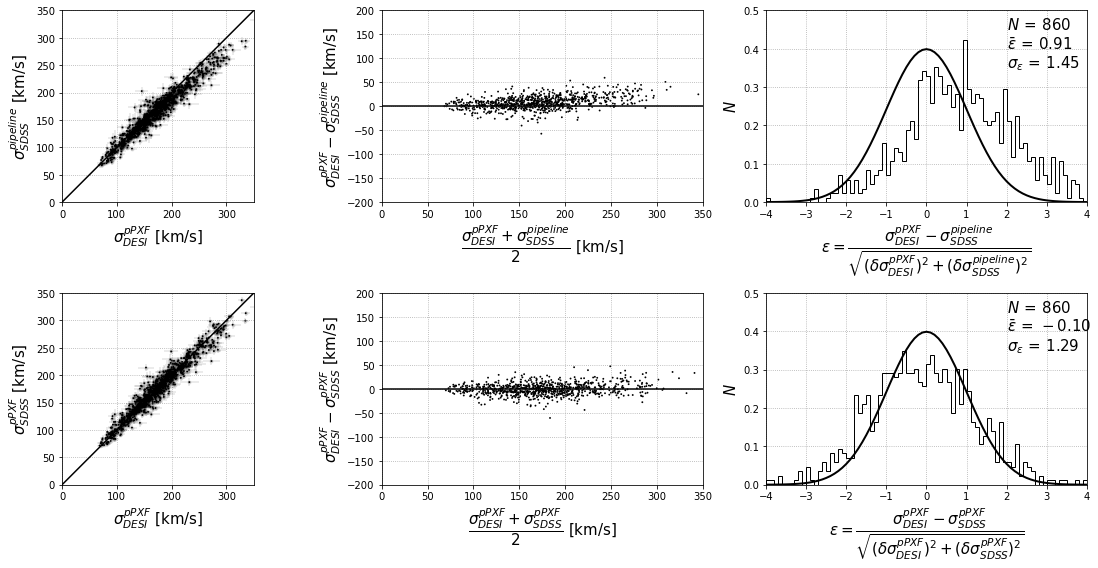

In [31]:
f_1, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(nrows=2,ncols=3, figsize=(16, 8),sharex=False, sharey=False)
ax1.set_ylim(0.0,350.0)
ax1.set_xlim(0.0,350.0)
xxx=[0,350];yyy=[0,350]
ax1.errorbar(ppxf_sigma_gs,veldisp_gs,xerr=ppxf_sigma_error_gs,yerr=veldispErr_gs,fmt=".k",alpha=0.1)
ax1.scatter(ppxf_sigma_gs,veldisp_gs,color='black',edgecolor='none',s=3.5)
ax1.plot(xxx,yyy,color="black")
ax1.set_aspect(1)
ax1.set_xlabel(r'$\sigma_{DESI}^{pPXF}$ [km/s]',size=15)
ax1.set_ylabel(r'$\sigma_{SDSS}^{pipeline}$ [km/s]',size=15)
ax1.grid(b=True, which='both', color='0.65',linestyle=':')

ax4.set_ylim(0.0,350.0)
ax4.set_xlim(0.0,350.0)
xxx=[0,350];yyy=[0,350]
ax4.errorbar(ppxf_sigma_gs,sigmaStars_gs,xerr=ppxf_sigma_error_gs,yerr=sigmaStarsErr_gs,fmt=".k",alpha=0.1)
ax4.scatter(ppxf_sigma_gs,sigmaStars_gs,color='black',edgecolor='none',s=3.5)
ax4.plot(xxx,yyy,color="black")
ax4.set_aspect(1)
ax4.set_xlabel(r'$\sigma_{DESI}^{pPXF}$ [km/s]',size=15)
ax4.set_ylabel(r'$\sigma_{SDSS}^{pPXF}$ [km/s]',size=15)
ax4.grid(b=True, which='both', color='0.65',linestyle=':')

ax2.set_ylim(-200,200)
ax2.set_xlim(0.0,350.0)
ax2.scatter(((ppxf_sigma_gs+veldisp_gs)/2.),ppxf_sigma_gs-veldisp_gs,color='black',edgecolor='none',s=3.5)
ax2.axhline(y=0.0,color="black")
ax2.grid(b=True, which='both', color='0.65',linestyle=':')
ax2.set_xlabel(r'$\dfrac{\sigma_{DESI}^{pPXF} + \sigma_{SDSS}^{pipeline}}{2}$ [km/s]',size=15)
ax2.set_ylabel(r'$\sigma_{DESI}^{pPXF} - \sigma_{SDSS}^{pipeline}$ [km/s]',size=15)

ax5.set_ylim(-200,200)
ax5.set_xlim(0.0,350.0)
ax5.scatter(((ppxf_sigma_gs+sigmaStars_gs)/2.),ppxf_sigma_gs-sigmaStars_gs,color='black',edgecolor='none',s=3.5)
ax5.axhline(y=0.0,color="black")
ax5.grid(b=True, which='both', color='0.65',linestyle=':')
ax5.set_xlabel(r'$\dfrac{\sigma_{DESI}^{pPXF} + \sigma_{SDSS}^{pPXF}}{2}$ [km/s]',size=15)
ax5.set_ylabel(r'$\sigma_{DESI}^{pPXF} - \sigma_{SDSS}^{pPXF}$ [km/s]',size=15)

ax3.set_ylim(0.0,0.5)
ax3.set_xlim(-4.0,4.0)
events_prop, edges_prop, patches_prop = ax3.hist(pull_pipe_1_gs,bins=np.arange(-5.0,5.0,0.1),density=1,histtype='step',color='black',label='sigmastar_lamost vs. veldisp_sdss')#,label='Normalized uncorrected $P(r)$')#
y = norm.pdf(edges_prop, 0.0, 1.0)
l = ax3.plot(edges_prop, y, 'k', linewidth=2,label='Gaussian with mean 0 and $\sigma$ 1')#,label='Gaussian fit to the uncorrected $P(r)$')
#plt.hist(pull_pipe,bins=arange(-5.0,5.0,0.1),color='black')
ax3.grid(b=True, which='both', color='0.65',linestyle=':')
ax3.set_xlabel(r'$\epsilon = \dfrac{\sigma_{DESI}^{pPXF} - \sigma_{SDSS}^{pipeline}}{\sqrt{(\delta \sigma_{DESI}^{pPXF})^2 + (\delta \sigma_{SDSS}^{pipeline})^2}}$',size=15)
ax3.set_ylabel(r'$N$',size=15)
ax3.text(2.0,0.45,r'$N\/=\/'+'{0:.0f}'.format(len(pull_pipe_1_gs))+'$',size=15)
ax3.text(2.0,0.4,r'$\bar{\epsilon}\/=\/'+'{0:.2f}'.format(np.mean(pull_pipe_1_gs))+'$',size=15)#, fontname = 'Times New Roman',size=20)
ax3.text(2.0,0.35,r'$\sigma_{\epsilon}\/=\/'+'{0:.2f}'.format(np.std(pull_pipe_1_gs))+'$',size=15)#, fontname = 'Times New Roman',size=20)

ax6.set_ylim(0.0,0.5)
ax6.set_xlim(-4.0,4.0)
events_prop, edges_prop, patches_prop = ax6.hist(pull_pipe_2_gs,bins=np.arange(-5.0,5.0,0.1),density=1,histtype='step',color='black',label='sigmastar_lamost vs. veldisp_sdss')#,label='Normalized uncorrected $P(r)$')#
y = norm.pdf(edges_prop, 0.0, 1.0)
l = ax6.plot(edges_prop, y, 'k', linewidth=2,label='Gaussian with mean 0 and $\sigma$ 1')#,label='Gaussian fit to the uncorrected $P(r)$')
#plt.hist(pull_pipe,bins=arange(-5.0,5.0,0.1),color='black')
ax6.grid(b=True, which='both', color='0.65',linestyle=':')
ax6.set_xlabel(r'$\epsilon = \dfrac{\sigma_{DESI}^{pPXF} - \sigma_{SDSS}^{pPXF}}{\sqrt{(\delta \sigma_{DESI}^{pPXF})^2 + (\delta \sigma_{SDSS}^{pPXF})^2}}$',size=15)
ax6.set_ylabel(r'$N$',size=15)
ax6.text(2.0,0.45,r'$N\/=\/'+'{0:.0f}'.format(len(pull_pipe_2_gs))+'$',size=15)
ax6.text(2.0,0.4,r'$\bar{\epsilon}\/=\/'+'{0:.2f}'.format(np.mean(pull_pipe_2_gs))+'$',size=15)#, fontname = 'Times New Roman',size=20)
ax6.text(2.0,0.35,r'$\sigma_{\epsilon}\/=\/'+'{0:.2f}'.format(np.std(pull_pipe_2_gs))+'$',size=15)#, fontname = 'Times New Roman',size=20)

plt.tight_layout()
plt.savefig('external_consistency_v2_gs.png')
plt.savefig('external_consistency_v2_gs.pdf')
plt.show()

In [42]:
fuji_low_res = pd.read_csv("fuji_FPT-fibermap-good-guys-results_low_res.txt")
fuji_low_res.drop_duplicates(subset=['targetid'])
fuji_low_res

,#fibermap_targetid,fibermap_i,ra,dec,targetid,id,healpix,survey,program,targetid.1,...,healpix_id.1,objid,brickid.1,brickname,ra.1,dec.1,ppxf_sigma,ppxf_sigma_error,DER_SNR,snr_ppxf
0,39628019404378007,67,2.502711,9.705738,39628019404378007,1173,19561,sv1,bright,39628019404378007,...,1173,3991,386319,0024p097,2.502711,9.705738,175.234961,6.335082,23.600929,2.016564
1,39628019412766185,295,2.986113,9.711880,39628019412766185,1172,19558,sv1,bright,39628019412766185,...,1172,3561,386321,0029p097,2.986113,9.711880,153.435492,9.191781,13.631348,1.459456
2,39628055102095782,17,3.077614,11.197945,39628055102095782,1174,19567,sv1,bright,39628055102095782,...,1174,422,394830,0031p112,3.077614,11.197945,34.215138,17.447360,8.521572,3.541357
3,39628043223828119,272,3.140486,10.783047,39628043223828119,1175,19565,sv1,bright,39628043223828119,...,1175,1687,391998,0031p107,3.140486,10.783047,190.365835,5.576040,25.609359,2.717659
4,39627995542980911,35,3.147049,8.749540,39627995542980911,1177,19555,sv1,bright,39627995542980911,...,1177,2351,380630,0031p087,3.147049,8.749540,83.546708,11.343718,9.277272,2.091734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7095,39628462264159624,479,357.084339,28.895477,39628462264159624,1039,20371,sv1,bright,39628462264159624,...,1039,3464,491905,3570p290,357.084339,28.895477,169.872121,3.749867,29.415755,2.126803
7096,39628451673539259,0,357.210430,28.577718,39628451673539259,1044,20368,sv1,bright,39628451673539259,...,1044,699,489380,3573p285,357.210430,28.577718,161.379511,2.412981,37.331741,3.553241
7097,39628456975140195,2,357.247043,28.635471,39628456975140195,1051,20369,sv1,bright,39628456975140195,...,1051,1379,490644,3572p287,357.247043,28.635471,135.724165,5.885100,17.090996,2.234724
7098,39628467548982836,300,357.637918,29.203475,39628467548982836,1039,20371,sv1,bright,39628467548982836,...,1039,3636,493165,3575p292,357.637918,29.203475,112.237952,1.701361,35.109614,9.057762


In [33]:
fuji_hlr_s = pd.merge(fdata,fuji_low_res,left_on='targetid',right_on='targetid')

In [34]:
fuji_hlr_s.columns.values

array(['targetid', 'ra_1', 'dec_1', 'ppxf_sigma_x', 'ppxf_sigma_error_x',
       'DER_SNR_x', 'snr_ppxf_x', 'objid_2', 'ra_2', 'dec_2',
       'h_alpha_eqw', 'sigmaStars', 'sigmaStarsErr', 'veldisp',
       'veldispErr', '#fibermap_targetid', 'fibermap_i', 'ra', 'dec',
       'id', 'healpix', 'survey', 'program', 'targetid.1', 'z', 'zerr',
       'zwarn', 'spectype', 'subtype', 'deltachi2', 'healpix_id',
       'targetid.2', 'target_ra', 'target_dec', 'obsconditions',
       'release', 'brickid', 'brick_objid', 'fiberflux_ivar_g',
       'fiberflux_ivar_r', 'fiberflux_ivar_z', 'morphtype', 'flux_g',
       'flux_r', 'flux_z', 'flux_ivar_g', 'flux_ivar_r', 'flux_ivar_z',
       'ebv', 'flux_w1', 'flux_w2', 'flux_ivar_w1', 'flux_ivar_w2',
       'fiberflux_g', 'fiberflux_r', 'fiberflux_z', 'fibertotflux_g',
       'fibertotflux_r', 'fibertotflux_z', 'sersic', 'coadd_numexp',
       'coadd_exptime', 'coadd_numnight', 'coadd_numtile', 'healpix_id.1',
       'objid', 'brickid.1', 'brickname

In [35]:
ppxf_sigma_lr = fuji_hlr_s.ppxf_sigma_y
ppxf_sigma_error_lr = fuji_hlr_s.ppxf_sigma_error_y
sigmaStars_lr = fuji_hlr_s.sigmaStars
sigmaStarsErr_lr = fuji_hlr_s.sigmaStarsErr
veldisp_lr = fuji_hlr_s.veldisp
veldispErr_lr = fuji_hlr_s.veldispErr
pull_pipe_1_lr = (ppxf_sigma_lr - veldisp_lr)/(np.sqrt((ppxf_sigma_error_lr*ppxf_sigma_error_lr)+(veldispErr_lr*veldispErr_lr)))
pull_pipe_2_lr = (ppxf_sigma_lr - sigmaStars_lr)/(np.sqrt((ppxf_sigma_error_lr*ppxf_sigma_error_lr)+(sigmaStarsErr_lr*sigmaStarsErr_lr)))

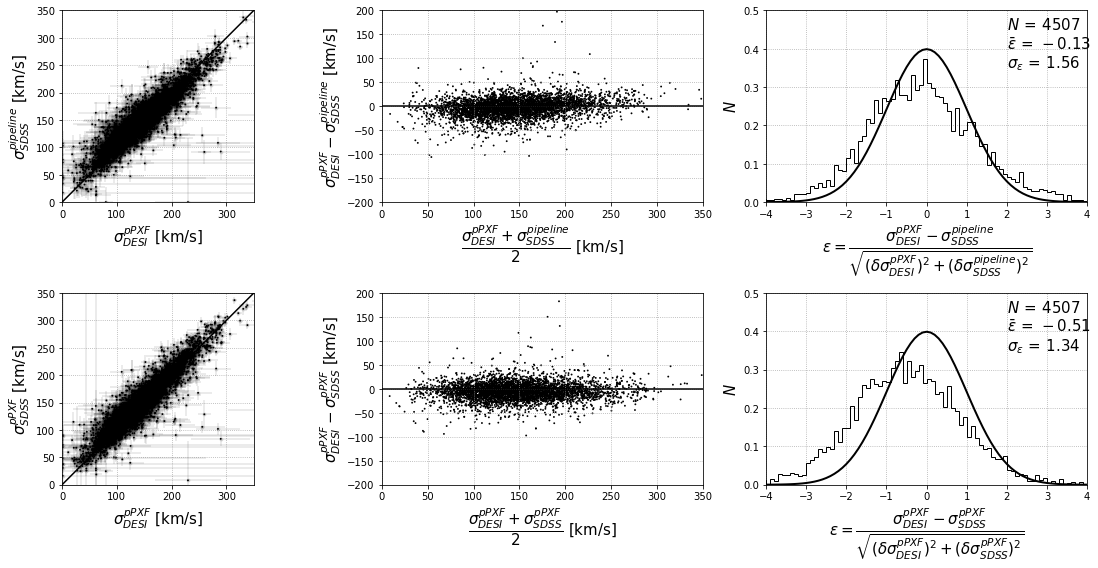

In [36]:
f_1, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(nrows=2,ncols=3, figsize=(16, 8),sharex=False, sharey=False)
ax1.set_ylim(0.0,350.0)
ax1.set_xlim(0.0,350.0)
xxx=[0,350];yyy=[0,350]
ax1.errorbar(ppxf_sigma_lr,veldisp_lr,xerr=ppxf_sigma_error_lr,yerr=veldispErr_lr,fmt=".k",alpha=0.1)
ax1.scatter(ppxf_sigma_lr,veldisp_lr,color='black',edgecolor='none',s=3.5)
ax1.plot(xxx,yyy,color="black")
ax1.set_aspect(1)
ax1.set_xlabel(r'$\sigma_{DESI}^{pPXF}$ [km/s]',size=15)
ax1.set_ylabel(r'$\sigma_{SDSS}^{pipeline}$ [km/s]',size=15)
ax1.grid(b=True, which='both', color='0.65',linestyle=':')

ax4.set_ylim(0.0,350.0)
ax4.set_xlim(0.0,350.0)
xxx=[0,350];yyy=[0,350]
ax4.errorbar(ppxf_sigma_lr,sigmaStars_lr,xerr=ppxf_sigma_error_lr,yerr=sigmaStarsErr_lr,fmt=".k",alpha=0.1)
ax4.scatter(ppxf_sigma_lr,sigmaStars_lr,color='black',edgecolor='none',s=3.5)
ax4.plot(xxx,yyy,color="black")
ax4.set_aspect(1)
ax4.set_xlabel(r'$\sigma_{DESI}^{pPXF}$ [km/s]',size=15)
ax4.set_ylabel(r'$\sigma_{SDSS}^{pPXF}$ [km/s]',size=15)
ax4.grid(b=True, which='both', color='0.65',linestyle=':')

ax2.set_ylim(-200,200)
ax2.set_xlim(0.0,350.0)
ax2.scatter(((ppxf_sigma_lr+veldisp_lr)/2.),ppxf_sigma_lr-veldisp_lr,color='black',edgecolor='none',s=3.5)
ax2.axhline(y=0.0,color="black")
ax2.grid(b=True, which='both', color='0.65',linestyle=':')
ax2.set_xlabel(r'$\dfrac{\sigma_{DESI}^{pPXF} + \sigma_{SDSS}^{pipeline}}{2}$ [km/s]',size=15)
ax2.set_ylabel(r'$\sigma_{DESI}^{pPXF} - \sigma_{SDSS}^{pipeline}$ [km/s]',size=15)

ax5.set_ylim(-200,200)
ax5.set_xlim(0.0,350.0)
ax5.scatter(((ppxf_sigma_lr+sigmaStars_lr)/2.),ppxf_sigma_lr-sigmaStars_lr,color='black',edgecolor='none',s=3.5)
ax5.axhline(y=0.0,color="black")
ax5.grid(b=True, which='both', color='0.65',linestyle=':')
ax5.set_xlabel(r'$\dfrac{\sigma_{DESI}^{pPXF} + \sigma_{SDSS}^{pPXF}}{2}$ [km/s]',size=15)
ax5.set_ylabel(r'$\sigma_{DESI}^{pPXF} - \sigma_{SDSS}^{pPXF}$ [km/s]',size=15)

ax3.set_ylim(0.0,0.5)
ax3.set_xlim(-4.0,4.0)
events_prop, edges_prop, patches_prop = ax3.hist(pull_pipe_1_lr,bins=np.arange(-5.0,5.0,0.1),density=1,histtype='step',color='black',label='sigmastar_lamost vs. veldisp_sdss')#,label='Normalized uncorrected $P(r)$')#
y = norm.pdf(edges_prop, 0.0, 1.0)
l = ax3.plot(edges_prop, y, 'k', linewidth=2,label='Gaussian with mean 0 and $\sigma$ 1')#,label='Gaussian fit to the uncorrected $P(r)$')
#plt.hist(pull_pipe,bins=arange(-5.0,5.0,0.1),color='black')
ax3.grid(b=True, which='both', color='0.65',linestyle=':')
ax3.set_xlabel(r'$\epsilon = \dfrac{\sigma_{DESI}^{pPXF} - \sigma_{SDSS}^{pipeline}}{\sqrt{(\delta \sigma_{DESI}^{pPXF})^2 + (\delta \sigma_{SDSS}^{pipeline})^2}}$',size=15)
ax3.set_ylabel(r'$N$',size=15)
ax3.text(2.0,0.45,r'$N\/=\/'+'{0:.0f}'.format(len(pull_pipe_1_lr))+'$',size=15)
ax3.text(2.0,0.4,r'$\bar{\epsilon}\/=\/'+'{0:.2f}'.format(np.mean(pull_pipe_1_lr))+'$',size=15)#, fontname = 'Times New Roman',size=20)
ax3.text(2.0,0.35,r'$\sigma_{\epsilon}\/=\/'+'{0:.2f}'.format(np.std(pull_pipe_1_lr))+'$',size=15)#, fontname = 'Times New Roman',size=20)

ax6.set_ylim(0.0,0.5)
ax6.set_xlim(-4.0,4.0)
events_prop, edges_prop, patches_prop = ax6.hist(pull_pipe_2_lr,bins=np.arange(-5.0,5.0,0.1),density=1,histtype='step',color='black',label='sigmastar_lamost vs. veldisp_sdss')#,label='Normalized uncorrected $P(r)$')#
y = norm.pdf(edges_prop, 0.0, 1.0)
l = ax6.plot(edges_prop, y, 'k', linewidth=2,label='Gaussian with mean 0 and $\sigma$ 1')#,label='Gaussian fit to the uncorrected $P(r)$')
#plt.hist(pull_pipe,bins=arange(-5.0,5.0,0.1),color='black')
ax6.grid(b=True, which='both', color='0.65',linestyle=':')
ax6.set_xlabel(r'$\epsilon = \dfrac{\sigma_{DESI}^{pPXF} - \sigma_{SDSS}^{pPXF}}{\sqrt{(\delta \sigma_{DESI}^{pPXF})^2 + (\delta \sigma_{SDSS}^{pPXF})^2}}$',size=15)
ax6.set_ylabel(r'$N$',size=15)
ax6.text(2.0,0.45,r'$N\/=\/'+'{0:.0f}'.format(len(pull_pipe_2_lr))+'$',size=15)
ax6.text(2.0,0.4,r'$\bar{\epsilon}\/=\/'+'{0:.2f}'.format(np.mean(pull_pipe_2_lr))+'$',size=15)#, fontname = 'Times New Roman',size=20)
ax6.text(2.0,0.35,r'$\sigma_{\epsilon}\/=\/'+'{0:.2f}'.format(np.std(pull_pipe_2_lr))+'$',size=15)#, fontname = 'Times New Roman',size=20)

plt.tight_layout()
plt.savefig('external_consistency_v2_lr.png')
plt.savefig('external_consistency_v2_lr.pdf')
plt.show()

In [46]:
fuji_lr_sdss_gold = pd.merge(fuji_sdss_golds,fuji_low_res,left_on='targetid',right_on='targetid')
#fuji_lr_sdss_gold.drop_duplicates()
fuji_lr_sdss_gold

,ra_1_x,dec_1_x,targetid_1,id_x,healpix_x,survey_x,program_x,targetid.1_x,z_1,zerr_x,...,healpix_id.1_y,objid_y,brickid.1_y,brickname,ra.1,dec.1,ppxf_sigma,ppxf_sigma_error,DER_SNR,snr_ppxf
0,184.913600,-0.750861,39627769709071900,1516,26254,sv1,bright,39627769709071900,0.029896,0.000003,...,1516,3612,326787,1848m007,184.913600,-0.750861,143.205749,1.398365,43.865699,11.104985
1,193.922076,27.250763,39628422523128777,1304,28149,sv1,bright,39628422523128777,0.023694,0.000007,...,1304,3017,482430,1939p272,193.922076,27.250763,262.780186,1.241255,92.909521,26.242992
2,193.922076,27.250763,39628422523128777,1304,28149,sv1,bright,39628422523128777,0.023694,0.000007,...,1304,3017,482430,1939p272,193.922076,27.250763,262.824339,1.239575,92.909521,26.236874
3,193.922076,27.250763,39628422523128777,1304,28149,sv1,bright,39628422523128777,0.023694,0.000007,...,3418,3017,482430,1939p272,193.922076,27.250763,262.799443,2.965525,51.806242,23.272918
4,193.922076,27.250763,39628422523128777,1304,28149,sv1,bright,39628422523128777,0.023694,0.000007,...,3418,3017,482430,1939p272,193.922076,27.250763,262.893431,2.963506,51.806242,23.361814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,253.397853,33.051466,39632941730499772,3529,9334,sv3,bright,39632941730499772,0.084868,0.000019,...,3529,3260,511317,2533p330,253.397853,33.051466,220.712897,9.211860,14.066246,1.420754
922,247.703678,42.392285,39633123280945563,3340,9984,sv3,bright,39633123280945563,0.093304,0.000023,...,3340,411,554602,2478p425,247.703678,42.392285,181.991423,9.316491,11.448731,1.261155
923,252.120915,36.145967,39633006431830890,3351,9431,sv3,bright,39633006431830890,0.071456,0.000023,...,3351,874,526743,2522p362,252.120915,36.145967,180.034334,11.347953,11.200414,1.825616
924,218.374730,3.905292,39627884997904170,3368,25982,sv3,bright,39627884997904170,0.086229,0.000022,...,3368,1834,354274,2184p040,218.374730,3.905292,130.729589,10.448759,9.339280,1.818602


In [47]:
fuji_lr_sdss_gold.columns.values

array(['ra_1_x', 'dec_1_x', 'targetid_1', 'id_x', 'healpix_x', 'survey_x',
       'program_x', 'targetid.1_x', 'z_1', 'zerr_x', 'zwarn_x',
       'spectype_x', 'subtype_x', 'deltachi2_x', 'healpix_id_x',
       'obsconditions_x', 'release_x', 'brickid_1', 'brick_objid_x',
       'sersic_1', 'coadd_numexp_x', 'coadd_exptime_x',
       'coadd_numnight_x', 'coadd_numtile_x', 'healpix_id.1_x', 'objid_1',
       'brickid.1_x', 'brickname_1', 'ppxf_sigma_x', 'ppxf_sigma_error_x',
       'DER_SNR_x', 'snr_ppxf_x', 'TYPE', 'SERSIC_2', 'Z_PHOT_MEDIAN',
       'Z_PHOT_L95', 'mag_g', 'mag_r', 'mag_z', 'mag_B', 'mag_g_err',
       'mag_r_err', 'mag_z_err', 'fibre_mag_g', 'fibre_mag_r',
       'fibre_mag_z', 'uncor_radius', 'uncor_radius_err', 'BA_ratio',
       'BA_ratio_error', 'circ_radius', 'pos_angle', 'tmass', 'flag',
       'z_2', 'rmag', 'g_r_PS1_5_cor', 'W2_W3', 'W2_W3_err', 'PS1_ibumpy',
       'zcmb_1', 'zcmb_group_1', 'dz', 'dz_group', 'r_1', 'er_1',
       'kcor_r_1', 'kcor_g_1', 'i_1'

In [48]:
ppxf_sigma_lr = fuji_lr_sdss_gold.ppxf_sigma
ppxf_sigma_error_lr = fuji_lr_sdss_gold.ppxf_sigma_error
sigmaStars_lr = fuji_lr_sdss_gold.sigmaStars
sigmaStarsErr_lr = fuji_lr_sdss_gold.sigmaStarsErr
veldisp_lr = fuji_lr_sdss_gold.veldisp
veldispErr_lr = fuji_lr_sdss_gold.veldispErr
pull_pipe_1_lr = (ppxf_sigma_lr - veldisp_lr)/(np.sqrt((ppxf_sigma_error_lr*ppxf_sigma_error_lr)+(veldispErr_lr*veldispErr_lr)))
pull_pipe_2_lr = (ppxf_sigma_lr - sigmaStars_lr)/(np.sqrt((ppxf_sigma_error_lr*ppxf_sigma_error_lr)+(sigmaStarsErr_lr*sigmaStarsErr_lr)))

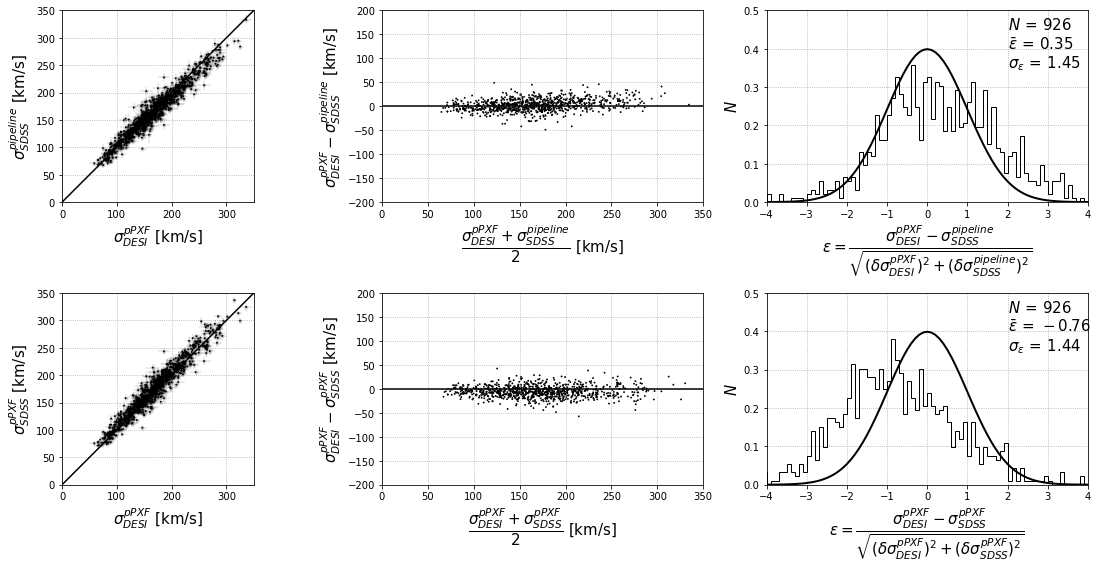

In [49]:
f_1, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(nrows=2,ncols=3, figsize=(16, 8),sharex=False, sharey=False)
ax1.set_ylim(0.0,350.0)
ax1.set_xlim(0.0,350.0)
xxx=[0,350];yyy=[0,350]
ax1.errorbar(ppxf_sigma_lr,veldisp_lr,xerr=ppxf_sigma_error_lr,yerr=veldispErr_lr,fmt=".k",alpha=0.1)
ax1.scatter(ppxf_sigma_lr,veldisp_lr,color='black',edgecolor='none',s=3.5)
ax1.plot(xxx,yyy,color="black")
ax1.set_aspect(1)
ax1.set_xlabel(r'$\sigma_{DESI}^{pPXF}$ [km/s]',size=15)
ax1.set_ylabel(r'$\sigma_{SDSS}^{pipeline}$ [km/s]',size=15)
ax1.grid(b=True, which='both', color='0.65',linestyle=':')

ax4.set_ylim(0.0,350.0)
ax4.set_xlim(0.0,350.0)
xxx=[0,350];yyy=[0,350]
ax4.errorbar(ppxf_sigma_lr,sigmaStars_lr,xerr=ppxf_sigma_error_lr,yerr=sigmaStarsErr_lr,fmt=".k",alpha=0.1)
ax4.scatter(ppxf_sigma_lr,sigmaStars_lr,color='black',edgecolor='none',s=3.5)
ax4.plot(xxx,yyy,color="black")
ax4.set_aspect(1)
ax4.set_xlabel(r'$\sigma_{DESI}^{pPXF}$ [km/s]',size=15)
ax4.set_ylabel(r'$\sigma_{SDSS}^{pPXF}$ [km/s]',size=15)
ax4.grid(b=True, which='both', color='0.65',linestyle=':')

ax2.set_ylim(-200,200)
ax2.set_xlim(0.0,350.0)
ax2.scatter(((ppxf_sigma_lr+veldisp_lr)/2.),ppxf_sigma_lr-veldisp_lr,color='black',edgecolor='none',s=3.5)
ax2.axhline(y=0.0,color="black")
ax2.grid(b=True, which='both', color='0.65',linestyle=':')
ax2.set_xlabel(r'$\dfrac{\sigma_{DESI}^{pPXF} + \sigma_{SDSS}^{pipeline}}{2}$ [km/s]',size=15)
ax2.set_ylabel(r'$\sigma_{DESI}^{pPXF} - \sigma_{SDSS}^{pipeline}$ [km/s]',size=15)

ax5.set_ylim(-200,200)
ax5.set_xlim(0.0,350.0)
ax5.scatter(((ppxf_sigma_lr+sigmaStars_lr)/2.),ppxf_sigma_lr-sigmaStars_lr,color='black',edgecolor='none',s=3.5)
ax5.axhline(y=0.0,color="black")
ax5.grid(b=True, which='both', color='0.65',linestyle=':')
ax5.set_xlabel(r'$\dfrac{\sigma_{DESI}^{pPXF} + \sigma_{SDSS}^{pPXF}}{2}$ [km/s]',size=15)
ax5.set_ylabel(r'$\sigma_{DESI}^{pPXF} - \sigma_{SDSS}^{pPXF}$ [km/s]',size=15)

ax3.set_ylim(0.0,0.5)
ax3.set_xlim(-4.0,4.0)
events_prop, edges_prop, patches_prop = ax3.hist(pull_pipe_1_lr,bins=np.arange(-5.0,5.0,0.1),density=1,histtype='step',color='black',label='sigmastar_lamost vs. veldisp_sdss')#,label='Normalized uncorrected $P(r)$')#
y = norm.pdf(edges_prop, 0.0, 1.0)
l = ax3.plot(edges_prop, y, 'k', linewidth=2,label='Gaussian with mean 0 and $\sigma$ 1')#,label='Gaussian fit to the uncorrected $P(r)$')
#plt.hist(pull_pipe,bins=arange(-5.0,5.0,0.1),color='black')
ax3.grid(b=True, which='both', color='0.65',linestyle=':')
ax3.set_xlabel(r'$\epsilon = \dfrac{\sigma_{DESI}^{pPXF} - \sigma_{SDSS}^{pipeline}}{\sqrt{(\delta \sigma_{DESI}^{pPXF})^2 + (\delta \sigma_{SDSS}^{pipeline})^2}}$',size=15)
ax3.set_ylabel(r'$N$',size=15)
ax3.text(2.0,0.45,r'$N\/=\/'+'{0:.0f}'.format(len(pull_pipe_1_lr))+'$',size=15)
ax3.text(2.0,0.4,r'$\bar{\epsilon}\/=\/'+'{0:.2f}'.format(np.mean(pull_pipe_1_lr))+'$',size=15)#, fontname = 'Times New Roman',size=20)
ax3.text(2.0,0.35,r'$\sigma_{\epsilon}\/=\/'+'{0:.2f}'.format(np.std(pull_pipe_1_lr))+'$',size=15)#, fontname = 'Times New Roman',size=20)

ax6.set_ylim(0.0,0.5)
ax6.set_xlim(-4.0,4.0)
events_prop, edges_prop, patches_prop = ax6.hist(pull_pipe_2_lr,bins=np.arange(-5.0,5.0,0.1),density=1,histtype='step',color='black',label='sigmastar_lamost vs. veldisp_sdss')#,label='Normalized uncorrected $P(r)$')#
y = norm.pdf(edges_prop, 0.0, 1.0)
l = ax6.plot(edges_prop, y, 'k', linewidth=2,label='Gaussian with mean 0 and $\sigma$ 1')#,label='Gaussian fit to the uncorrected $P(r)$')
#plt.hist(pull_pipe,bins=arange(-5.0,5.0,0.1),color='black')
ax6.grid(b=True, which='both', color='0.65',linestyle=':')
ax6.set_xlabel(r'$\epsilon = \dfrac{\sigma_{DESI}^{pPXF} - \sigma_{SDSS}^{pPXF}}{\sqrt{(\delta \sigma_{DESI}^{pPXF})^2 + (\delta \sigma_{SDSS}^{pPXF})^2}}$',size=15)
ax6.set_ylabel(r'$N$',size=15)
ax6.text(2.0,0.45,r'$N\/=\/'+'{0:.0f}'.format(len(pull_pipe_2_lr))+'$',size=15)
ax6.text(2.0,0.4,r'$\bar{\epsilon}\/=\/'+'{0:.2f}'.format(np.mean(pull_pipe_2_lr))+'$',size=15)#, fontname = 'Times New Roman',size=20)
ax6.text(2.0,0.35,r'$\sigma_{\epsilon}\/=\/'+'{0:.2f}'.format(np.std(pull_pipe_2_lr))+'$',size=15)#, fontname = 'Times New Roman',size=20)

plt.tight_layout()
plt.savefig('external_consistency_v2_lr.png')
plt.savefig('external_consistency_v2_lr.pdf')
plt.show()